In [1]:
#import all needed libraries and perform required configuration setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white',palette='Dark2',rc={'figure.figsize':(9,6),'figure.dpi':90})


## Set random seed

In [2]:
seed = 500

In [3]:
# Import the data
df = pd.read_csv(r"C:\Users\lanre\Documents\data_science\preprocessed_frl_fake.csv")
df.head()

,domain,content,scraped_at,title,label,day_name
0,nytimes,month threejudge panel federal appeal court re...,2018-02-11 00:42:14.935145+00:00,appeal challenge child,real,sunday
1,yahoo,stockholm reuters sweden seek assurance presid...,2016-11-11 14:16:53.754000+00:00,sweden seek assurance trump defense agreement,real,friday
2,nytimes,week bus practice gained widespread publicity ...,2018-02-11 00:45:31.225957+00:00,brooklyn clash religious woman right,real,sunday
3,yahoo,beirut latest development syria backed kurdish...,2016-11-08 03:28:07.118000+00:00,latest turkey kurd naive,real,tuesday
4,sfgate,hotshooting tennessee tech rout alabama publis...,2016-11-18 22:38:10.550000+00:00,hotshooting tennessee tech rout alabama sfgate,real,friday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788000 entries, 0 to 1787999
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   domain      object
 1   content     object
 2   scraped_at  object
 3   title       object
 4   label       object
 5   day_name    object
dtypes: object(6)
memory usage: 81.8+ MB


In [5]:
# checking missing values
def missing_value(df):
    """" Function to calculate the number and percent of missing values in a dataframe"""
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_value = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    return missing_value

In [6]:
missing_value(df)

,Total,Percent
title,12629,0.706320
content,18,0.001007
day_name,0,0.000000
label,0,0.000000
scraped_at,0,0.000000
domain,0,0.000000


In [7]:
df.dropna(inplace=True)
missing_value(df)

,Total,Percent
day_name,0,0.0
label,0,0.0
title,0,0.0
scraped_at,0,0.0
content,0,0.0
domain,0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775353 entries, 0 to 1787999
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   domain      object
 1   content     object
 2   scraped_at  object
 3   title       object
 4   label       object
 5   day_name    object
dtypes: object(6)
memory usage: 94.8+ MB


**Exploring few rows from title and column**

In [9]:
# Taking a look at some few rows in the title
for index,text in enumerate(df['title'][120:123]):
    print('Title %d:\n'%(index+1),text, '\n')

Title 1:
 weekender richmond mass 

Title 2:
 preview sun wizard reuters 

Title 3:
 afghanistan failing force 



In [10]:
# Taking a look at some  rows in the content column
for index,text in enumerate(df['content'][120:123]):
    print('Content %d:\n'%(index+1),text, '\n')

Content 1:
 regulation passed stampede veteran baby boomer quarteracre splitlevel said fullblown zoning bylaw helped shield egregious development place accident horse outnumber people richmond working horse farm building permit issued year lot minimum half acre prevent unsightly mountaintop development landowner parcel foot grade percent higher town conservation committee permission building rule richmond worth beauty valley nestled foot lenox mountain cone brook running beguiles prospective buyer year jonathan feuer importer great neck wife marcia director public policy mental health association spent month futile search second home berkshire couple given broker west stockbridge told land sale richmond combined parcel acre built threebedroom threebath house barn loft bedroom bath intended build house said waiting feuer recalled scene interested history richmond plenty originally lenox known time mount ephraim yoakun town micah mudge ichabod wood settled renamed place richmont official

## Frequencies of words visualization

**The `counter` function from the `collections` library will be used to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in natural language processing**

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lanre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)

###  Plot of top 20 words in the title

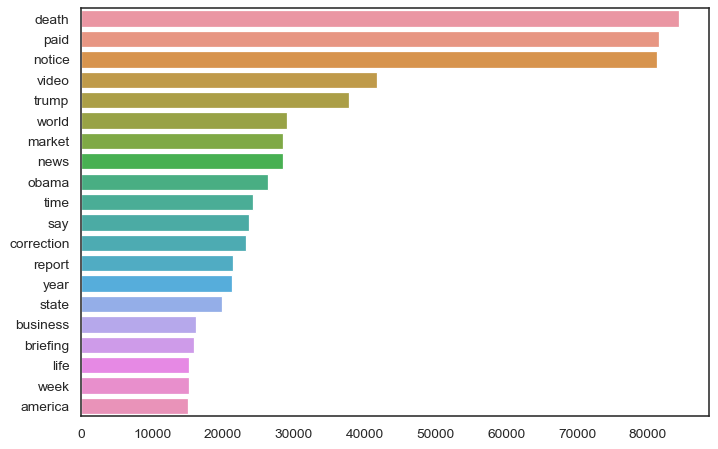

In [13]:
plot_top_non_stopwords_barchart(df['title']);

###  Plot of top 20 words in the content

In [ ]:
#plot_top_non_stopwords_barchart(df['content']); # skipped because it is taking forever to run

### Distribution of words and characters in the text 

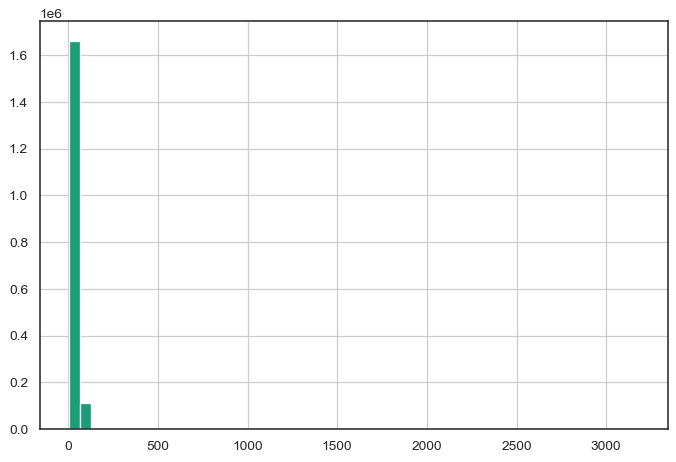

In [15]:
#Number of characters in the title
df['title'].str.len().hist(bins=50);

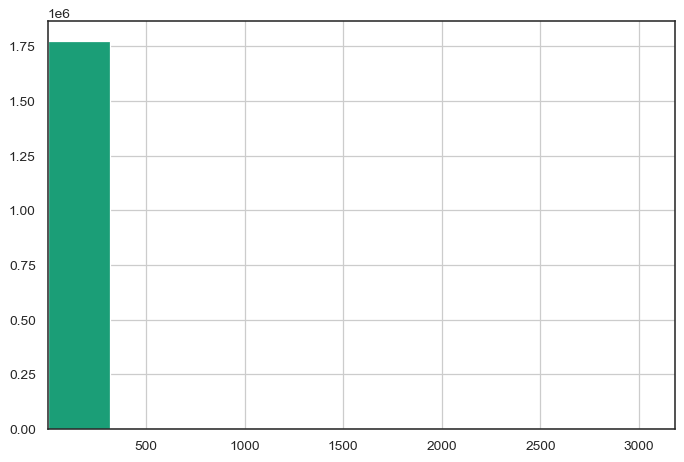

In [16]:
df['title'].str.len().hist().autoscale(enable=True, axis='x', tight=True);

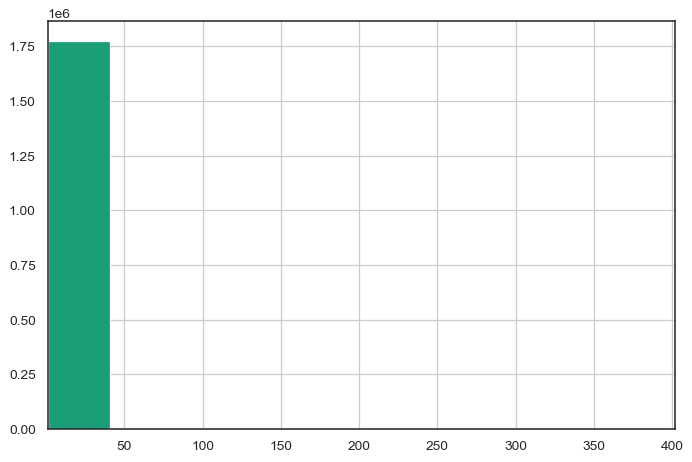

In [17]:
#The number of words- plot the number of words appearing in each title
df['title'].str.split().map(lambda x: len(x)).hist().autoscale(enable=True, axis='x', tight=True);

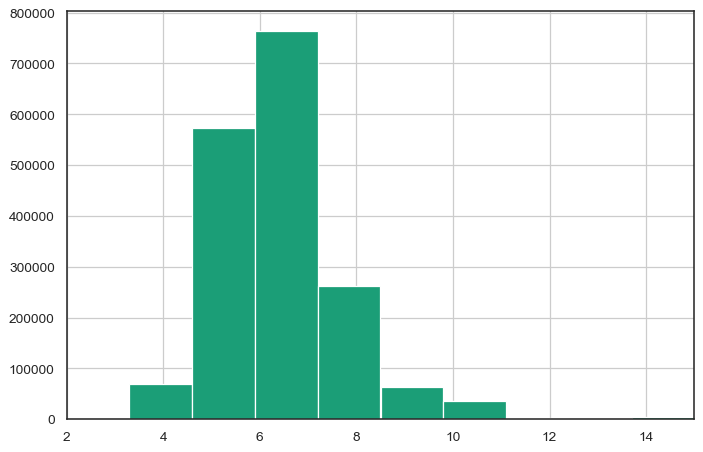

In [18]:
#Average word length 
df['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.autoscale(enable=True, axis='x', tight=True);

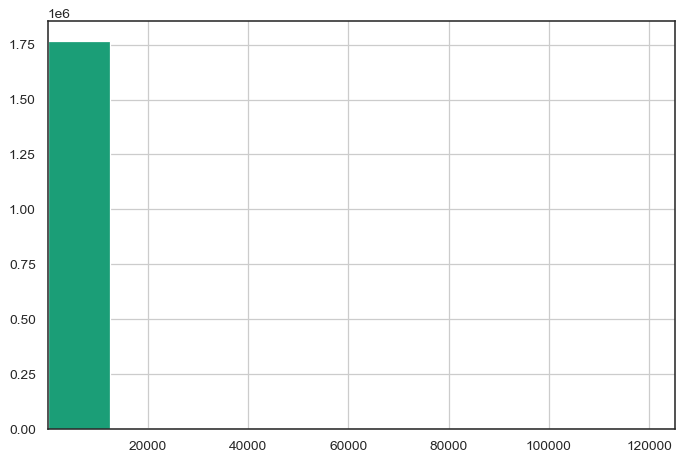

In [20]:
#Number of characters present in content row. This can give us a rough idea about the content length
df['content'].str.len().hist().autoscale(enable=True, axis='x', tight=True);

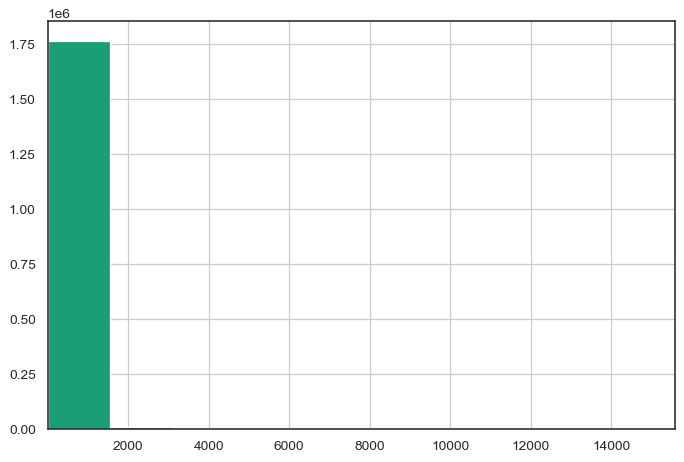

In [21]:
#The number of words in each content
df['content'].str.split().map(lambda x: len(x)).hist().autoscale(enable=True, axis='x', tight=True);

In [22]:
#Average word length 
df['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(bins=10)
plt.autoscale(enable=True, axis='x', tight=True);


KeyboardInterrupt



In [ ]:
# The total number of words in the content
df['content'].apply(lambda x: len(x.split(' '))).sum()

## Ngram exploration
Ngrams are simply contiguous sequences of n words.

In [23]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

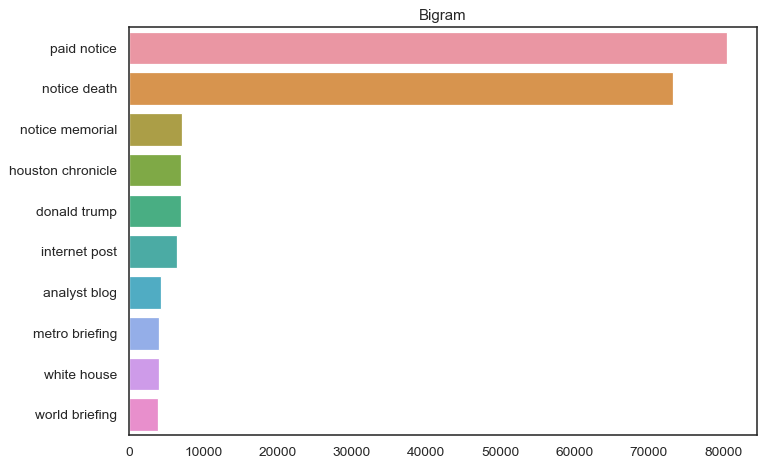

In [24]:
top_n_bigrams=get_top_ngram(df['title'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set_title('Bigram');

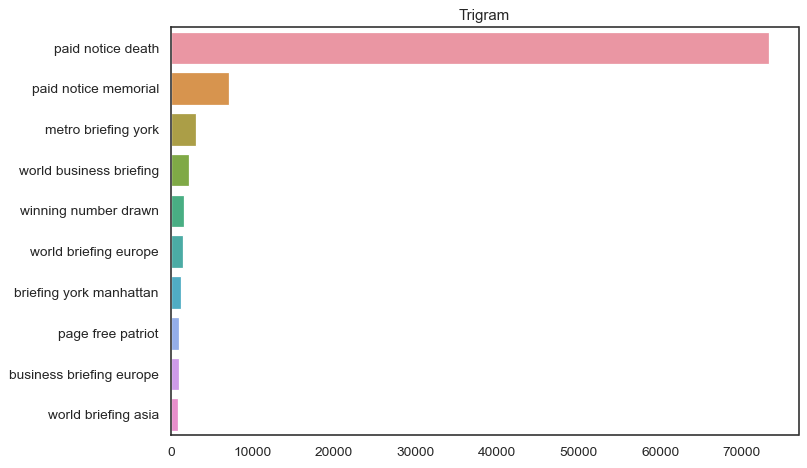

In [25]:
top_n_bigrams=get_top_ngram(df['title'],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set_title('Trigram');

In [ ]:
# Content column
top_n_bigrams=get_top_ngram(df['content'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set_title('Bigram');

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=2000,
        max_font_size=40,
        scale=3,
        random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
#
top_n_bigrams=get_top_ngram(df['content'],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x).set_title('Trigram');

## Wordcloud

In [ ]:
#wordcloud for the title
show_wordcloud(df['title'])

In [ ]:
    #Wordcloud for the content
show_wordcloud(df['content'])

# Feature engineering and word embedding

Our data contains heterogeneous data types, there are  categorical  and text data. We want to use different pre-processing steps and  transformations for those different types of columns.

For example: we may want to `one-hot encode` the categorical features and `tfidfvectorize` the text features.

Label encode the `label` column which is the target feature that will be predicted.

In [9]:
#Convert `domain` to category data type.
#Convert `dayofweek` to category data type.
df['domain'] = df['domain'].astype('category')
df['day_name'] = df['day_name'].astype('category')


### Features and target variables

In [10]:
target = df.label
features = df[['domain', 'content', 'title','day_name']].copy()

### Split the data in training and test sets:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=seed)
print(df.shape); print(X_train.shape); print(X_test.shape)

(1775353, 6)
(1242747, 4)
(532606, 4)


### Apply [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html). 

In [12]:

#Important:  pass the columns as string to CountVectorizer/TfifVectorizer and list of columns (even list of one column) to 
# OneHotEncoding (OHE) to make it work
ct = ColumnTransformer(
    [('domain_category', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['domain']),
     ('day_name_category', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['day_name']),
     ('title_countvec', CountVectorizer(), 'title'),
     ('content_tfidf', TfidfVectorizer(max_features = 6000, stop_words = 'english'), 'content')])

In [14]:
# Creating the Tfidf matrix
X_train_tfidf = ct.fit_transform(X_train)
X_test_tfidf = ct.transform(X_test)

In [15]:
print(f'Shape of Term Frequency Matrix of train: {X_train_tfidf.shape}')
print(f'Shape of Term Frequency Matrix of test: {X_test_tfidf.shape}')

Shape of Term Frequency Matrix of train: (1242747, 209872)
Shape of Term Frequency Matrix of test: (532606, 209872)


## Encoding the label

In [16]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)
print(y_train.shape); print(y_test.shape)

(1242747,)
(532606,)


# Random Forest Classifier model with default parameters

**Model with RandomForest classifier with default 100 decision trees**


In [17]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=seed)
# fit the model
rfc.fit(X_train_tfidf, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test_tfidf)
# Check accuracy score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9898


**Random Forest Classifier model with 200 Decision Trees** 

In [18]:
# instantiate the classifier with n_estimators = 200
rfc200 = RandomForestClassifier(n_estimators=200, random_state=seed)
# fit the model to the training set
rfc200.fit(X_train_tfidf, y_train)
# Predict on the test set results
y_pred_200 = rfc200.predict(X_test_tfidf)
# Check accuracy score 
print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_200)))

Model accuracy score with 200 decision-trees : 0.9909


## Feature importance

**Investigating to see only the important features that can be used to build another the model** 

In [19]:
# create the classifier with n_estimators = 200
clf = RandomForestClassifier(n_estimators=200, random_state=seed)

# fit the model to the training set
clf.fit(X_train_tfidf, y_train)


RandomForestClassifier(n_estimators=200, random_state=500)

In [25]:
# Check accuracy score 
print('Model accuracy score with native_country_41 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with native_country_41 variable removed : 0.9898


In [21]:
clf.feature_importances_

array([4.52306844e-05, 3.50964436e-06, 6.18320797e-07, ...,
       1.04307457e-05, 8.09026044e-06, 5.27750472e-05])

In [20]:
# Using feature importance variable to see feature importance scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train_tfidf.columns).sort_values(ascending=False)
feature_scores

AttributeError: columns not found

**Build the Random Forest model on selected features**

## Confusion matrix 

In [26]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred_200)
print('Confusion matrix\n\n', cm)



Confusion matrix

 [[265271    573]
 [  4283 262479]]


The confusion matrix shows 265271 + 262479 = 527,750 correct predictions and 573 + 4283= 4856 incorrect predictions.
- True Positives(TP) (Actual Positive:1 and Predict Positive:1) - 265271
- True Negatives (TN) (Actual Negative:0 and Predict Negative:0) - 262479
- False Positives (FP) (Actual Negative:0 but Predict Positive:1) - 573 (Type I error)
- False Negatives (FN) (Actual Positive:1 but Predict Negative:0) - 4283 (Type II error)


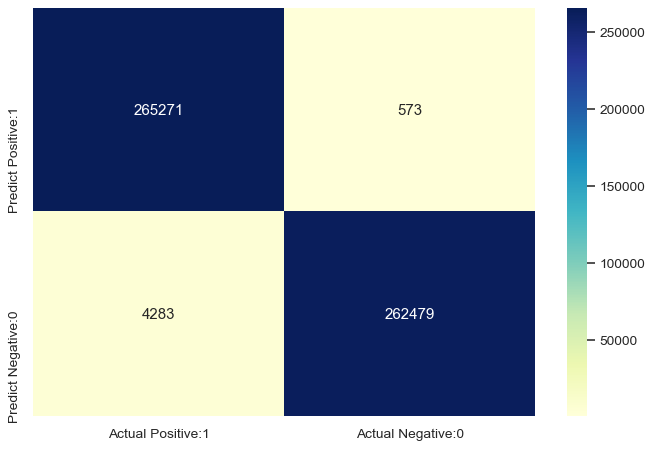

In [27]:
# visualize confusion matrix with heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');

## Classification Report

In [28]:
print(classification_report(y_test, y_pred_200))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    265844
           1       1.00      0.98      0.99    266762

    accuracy                           0.99    532606
   macro avg       0.99      0.99      0.99    532606
weighted avg       0.99      0.99      0.99    532606



# Results and Conclusion

-  Two Random Forest Classifiers (with 100 and 200 decision trees) were used to predict whether a news article is real or fake. 
- The model accuracy score with 100 decision-trees is 0.9898 which increases to 0.9909 when the number of decision-trees in the model was increased to 200.
- Other tools like the classification report and confusion matrix are used to present the performance of the Random Forest classification model